In [1]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import db_dtypes
import bigframes.pandas as bpd
from IPython.display import display, HTML
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from datetime import datetime
from typing import Union
import logging
import sys
import io
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

test_data = """

SELECT dto.test_id
       ,dto.test_name
       ,dto.entity_id
       ,dto.created_date
       ,order_day
       ,order_hour
       ,vendor_id
       ,vendor_vertical_parent
       ,platform_order_code
       ,is_sent
       ,is_own_delivery
       ,is_pickup
       ,customer_id
       ,dps_session_id
       ,test_variant
       ,is_in_treatment
       ,dps_basket_value_local
       ,dps_basket_value_eur
       ,gmv_local
       ,gmv_eur
       ,gfv_local
       ,gfv_eur
       ,discount_dh_local
       ,discount_dh_eur
       ,voucher_dh_local
       ,voucher_dh_eur
       ,revenue_local
       ,revenue_eur
       ,profit_local
       ,profit_eur
       ,delivery_costs_local
       ,delivery_costs_eur
       ,fully_loaded_gross_profit_local
       ,fully_loaded_gross_profit_eur
FROM `fulfillment-dwh-production.cl.dps_test_orders` dto
WHERE dto.test_id = 451
  AND dto.entity_id = 'HS_SA'
  AND is_sent


"""

project_id = "logistics-customer-staging"

try:
    logging.info(f"Initializing BigQuery client for project: {project_id}")
    client = bigquery.Client(project=project_id)
except Exception as e:
    logging.error(f"Failed to initialize BigQuery client: {e}")
    sys.exit(1)


/Users/shazeb.asad/global_pricing/.venv/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [2]:
test_df = client.query(test_data).to_dataframe()

In [3]:
test_df

,test_id,test_name,entity_id,created_date,order_day,order_hour,vendor_id,vendor_vertical_parent,platform_order_code,is_sent,...,voucher_dh_local,voucher_dh_eur,revenue_local,revenue_eur,profit_local,profit_eur,delivery_costs_local,delivery_costs_eur,fully_loaded_gross_profit_local,fully_loaded_gross_profit_eur
0,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-02-03,Monday,19:16,115140,restaurants,543891160,True,...,0E-9,0E-9,17.090000,4.410000,17.090000,4.410000,NaN,NaN,-9.110000,-2.350000
1,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-02-03,Monday,19:34,18871,restaurants,779742944,True,...,0E-9,0E-9,5.630000,1.450000,5.630000,1.450000,NaN,NaN,-3.370000,-0.870000
2,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-02-03,Monday,10:18,68181,restaurants,386946943,True,...,0E-9,0E-9,11.000000,2.840000,11.000000,2.840000,NaN,NaN,0.000000,0.000000
3,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-02-03,Monday,20:02,8447,restaurants,228824323,True,...,0E-9,0E-9,8.770000,2.260000,8.770000,2.260000,NaN,NaN,-5.230000,-1.350000
4,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-02-03,Monday,18:28,44381,restaurants,767477766,True,...,0E-9,0E-9,5.660000,1.460000,5.660000,1.460000,NaN,NaN,-2.090000,-0.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615351,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-01-28,Tuesday,13:15,5988,restaurants,438883545,True,...,0E-9,0E-9,39.220435,10.035652,23.784483,6.092800,15.435952,3.942852,23.784483,6.092800
2615352,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-01-28,Tuesday,21:14,132276,restaurants,719462723,True,...,0E-9,0E-9,24.170435,6.185652,6.901546,1.774607,17.268889,4.411045,6.901546,1.774607
2615353,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-01-28,Tuesday,21:52,105767,restaurants,319722488,True,...,0E-9,0E-9,23.670435,6.055652,7.094592,1.821634,16.575843,4.234018,7.094592,1.821634
2615354,451.000000000,SA_20250127_R_Z0_O_Riyadh_JOYNO,HS_SA,2025-01-28,Tuesday,03:19,131457,restaurants,243079169,True,...,0E-9,0E-9,21.650435,5.535652,2.858771,0.735640,18.791664,4.800012,2.858771,0.735640


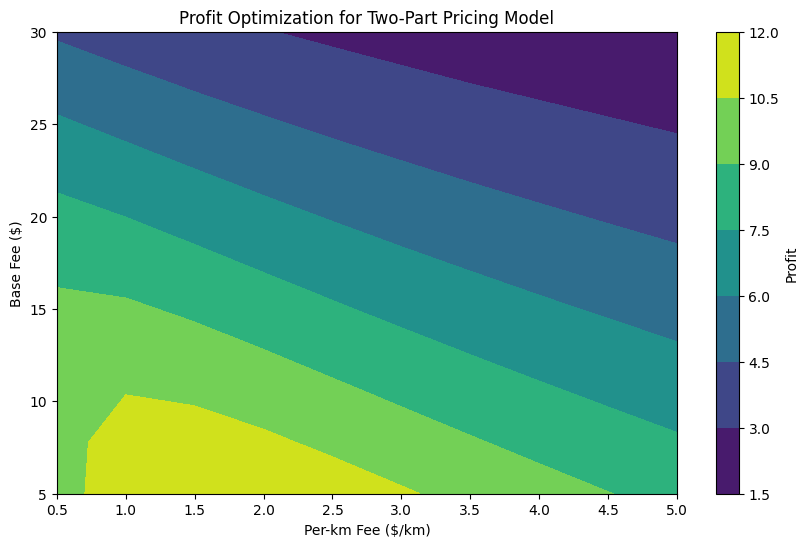

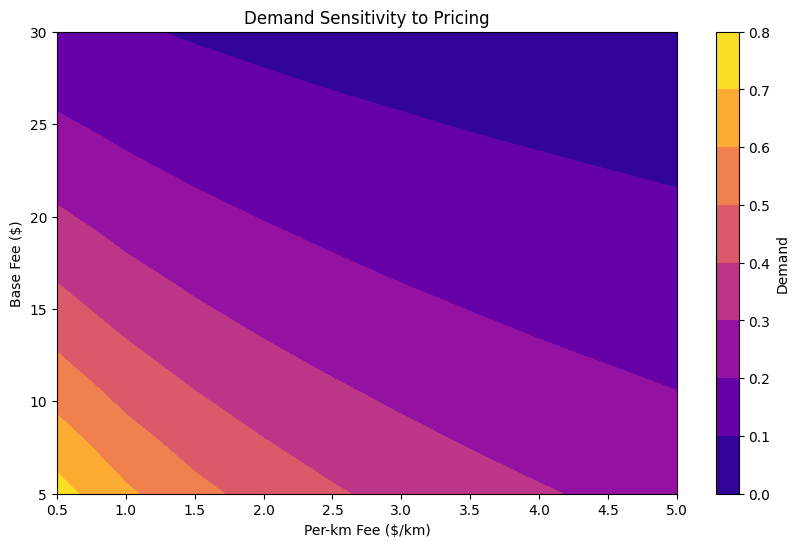

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
vh = 50   # Max customer valuation
c = 2     # Cost per unit distance
delta = 0.1  # Market demand scaling factor

# Define functions for demand, profit, and delivery region

def demand(a, b, w):
    return delta * ((vh - a - c * w) ** 2) / (2 * vh * (b + c))

def delivery_region(vh, a, b, c, w):
    return (vh - a - c * w) / (b + c)

def profit(a, b, w):
    x = delivery_region(vh, a, b, c, w)
    return delta * ((b + c) * x ** 2 / (2 * vh)) * (vh - (2 * b / 3) - c * x - c * w)

def simulate_pricing():
    base_fees = np.linspace(5, 30, 10)  # Base fee range
    per_km_fees = np.linspace(0.5, 5, 10)  # Per-km fee range
    
    profits = np.zeros((len(base_fees), len(per_km_fees)))
    demands = np.zeros((len(base_fees), len(per_km_fees)))
    
    for i, a in enumerate(base_fees):
        for j, b in enumerate(per_km_fees):
            w = 1  # Assume a fixed in-line delay for simplicity
            demands[i, j] = demand(a, b, w)
            profits[i, j] = profit(a, b, w)
    
    # Plot trade-off
    plt.figure(figsize=(10, 6))
    plt.contourf(per_km_fees, base_fees, profits, cmap='viridis')
    plt.colorbar(label='Profit')
    plt.xlabel("Per-km Fee ($/km)")
    plt.ylabel("Base Fee ($)")
    plt.title("Profit Optimization for Two-Part Pricing Model")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.contourf(per_km_fees, base_fees, demands, cmap='plasma')
    plt.colorbar(label='Demand')
    plt.xlabel("Per-km Fee ($/km)")
    plt.ylabel("Base Fee ($)")
    plt.title("Demand Sensitivity to Pricing")
    plt.show()

simulate_pricing()


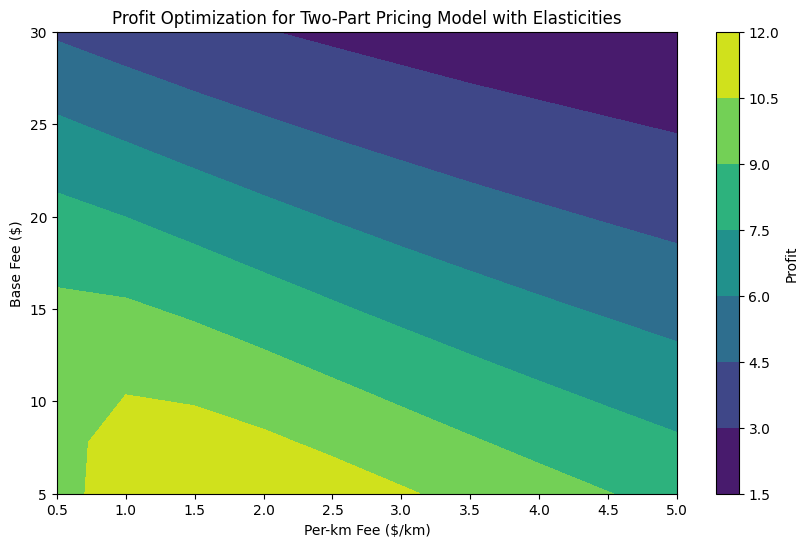

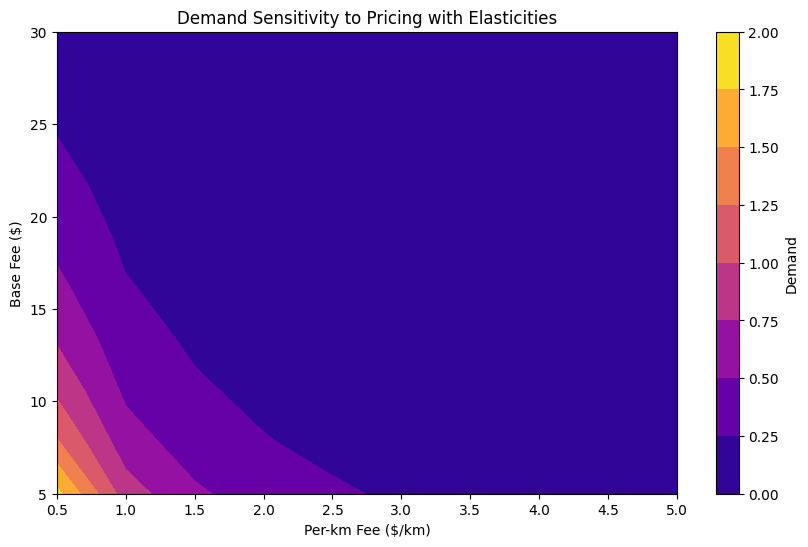

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
vh = 50   # Max customer valuation
c = 2     # Cost per unit distance
delta = 0.1  # Market demand scaling factor

# Elasticities
eps_a = 0.5  # Base fee elasticity
eps_b = 0.8  # Per-km elasticity

# Define functions for demand, profit, and delivery region
def demand(a, b, w):
    """Demand function with explicit price elasticity effects."""
    base_factor = (a / 10) ** (-eps_a)  # Effect of base fee on demand
    per_km_factor = (b / 1) ** (-eps_b)  # Effect of per-km fee on demand
    return delta * ((vh - a - c * w) ** 2) / (2 * vh * (b + c)) * base_factor * per_km_factor

def delivery_region(vh, a, b, c, w):
    """Delivery region boundary calculation."""
    return (vh - a - c * w) / (b + c)

def profit(a, b, w):
    """Profit function considering demand and delivery region."""
    x = delivery_region(vh, a, b, c, w)
    return delta * ((b + c) * x ** 2 / (2 * vh)) * (vh - (2 * b / 3) - c * x - c * w)

# Simulation
base_fees = np.linspace(5, 30, 10)  # Base fee range
per_km_fees = np.linspace(0.5, 5, 10)  # Per-km fee range

profits = np.zeros((len(base_fees), len(per_km_fees)))
demands = np.zeros((len(base_fees), len(per_km_fees)))

for i, a in enumerate(base_fees):
    for j, b in enumerate(per_km_fees):
        w = 1  # Assume a fixed in-line delay for simplicity
        demands[i, j] = demand(a, b, w)
        profits[i, j] = profit(a, b, w)

# Plot trade-off: Profit vs. Pricing Structure
plt.figure(figsize=(10, 6))
plt.contourf(per_km_fees, base_fees, profits, cmap='viridis')
plt.colorbar(label='Profit')
plt.xlabel("Per-km Fee ($/km)")
plt.ylabel("Base Fee ($)")
plt.title("Profit Optimization for Two-Part Pricing Model with Elasticities")
plt.show()

# Plot demand sensitivity
plt.figure(figsize=(10, 6))
plt.contourf(per_km_fees, base_fees, demands, cmap='plasma')
plt.colorbar(label='Demand')
plt.xlabel("Per-km Fee ($/km)")
plt.ylabel("Base Fee ($)")
plt.title("Demand Sensitivity to Pricing with Elasticities")
plt.show()

# Display data in table format
import pandas as pd
df_results = pd.DataFrame({
    "Base Fee ($)": np.repeat(base_fees, len(per_km_fees)),
    "Per-km Fee ($/km)": np.tile(per_km_fees, len(base_fees)),
    "Profit": profits.flatten(),
    "Demand": demands.flatten(),
})



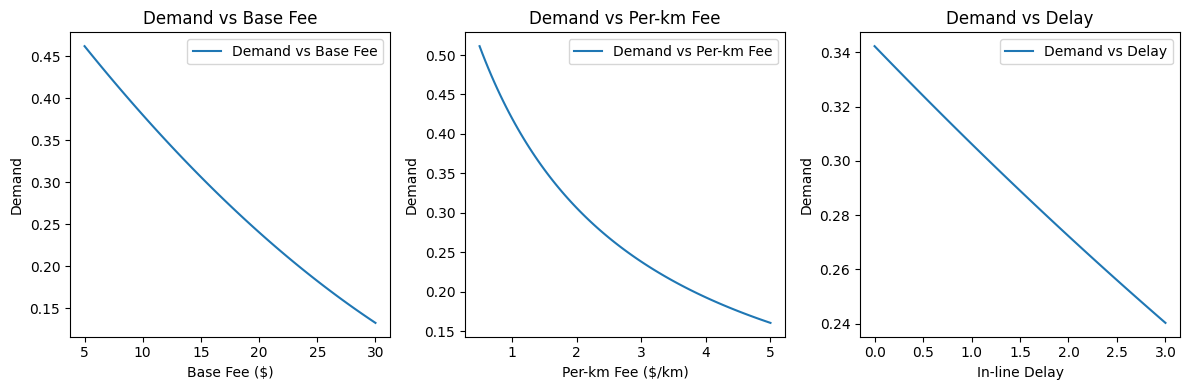

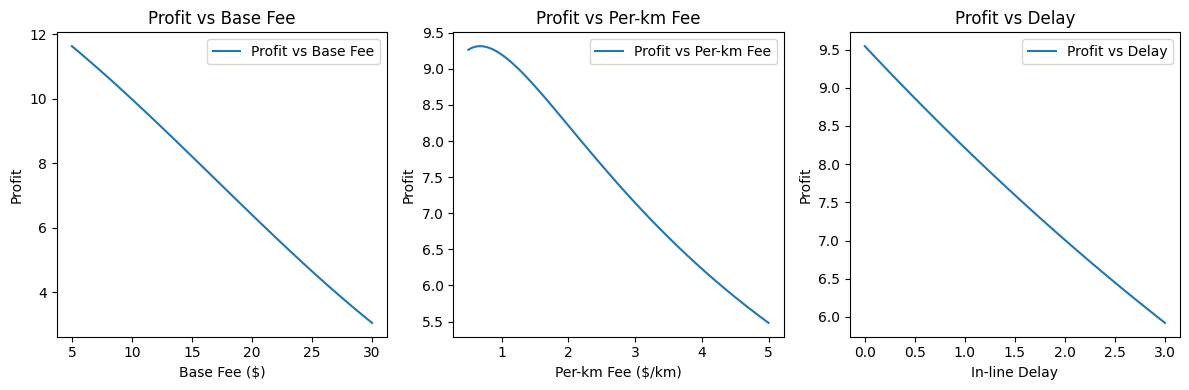

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
vh = 50   # Max customer valuation
c = 2     # Cost per unit distance
delta = 0.1  # Market demand scaling factor

# Define functions for demand, profit, and delivery region
def demand(a, b, w, eps_a=1, eps_b=1):
    """Calculate demand as a function of base fee (a), per-km fee (b), and delay (w) with elasticity."""
    return delta * ((vh - a * eps_a - b * eps_b - c * w) ** 2) / (2 * vh * (b + c))

def delivery_region(vh, a, b, c, w):
    """Calculate maximum delivery distance at which customers still order."""
    return (vh - a - c * w) / (b + c)

def profit(a, b, w, eps_a=1, eps_b=1):
    """Calculate profit based on two-part pricing model."""
    x = delivery_region(vh, a, b, c, w)
    return delta * ((b + c) * x ** 2 / (2 * vh)) * (vh - (2 * b / 3) - c * x - c * w)

# Define parameter ranges
base_fees = np.linspace(5, 30, 100)  # Base fee range
per_km_fees = np.linspace(0.5, 5, 100)  # Per-km fee range
delays = np.linspace(0, 3, 100)  # Delay range

# Fixed values for comparisons
fixed_base_fee = 15
fixed_per_km_fee = 2
fixed_delay = 1
eps_a = 0.8  # Elasticity factor for base fee
eps_b = 0.5  # Elasticity factor for per-km fee

# Compute function values separately
demand_vs_base_fee = [demand(a, fixed_per_km_fee, fixed_delay, eps_a, eps_b) for a in base_fees]
demand_vs_per_km_fee = [demand(fixed_base_fee, b, fixed_delay, eps_a, eps_b) for b in per_km_fees]
demand_vs_delay = [demand(fixed_base_fee, fixed_per_km_fee, w, eps_a, eps_b) for w in delays]

profit_vs_base_fee = [profit(a, fixed_per_km_fee, fixed_delay, eps_a, eps_b) for a in base_fees]
profit_vs_per_km_fee = [profit(fixed_base_fee, b, fixed_delay, eps_a, eps_b) for b in per_km_fees]
profit_vs_delay = [profit(fixed_base_fee, fixed_per_km_fee, w, eps_a, eps_b) for w in delays]

# Plot demand functions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(base_fees, demand_vs_base_fee, label="Demand vs Base Fee")
plt.xlabel("Base Fee ($)")
plt.ylabel("Demand")
plt.title("Demand vs Base Fee")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(per_km_fees, demand_vs_per_km_fee, label="Demand vs Per-km Fee")
plt.xlabel("Per-km Fee ($/km)")
plt.ylabel("Demand")
plt.title("Demand vs Per-km Fee")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(delays, demand_vs_delay, label="Demand vs Delay")
plt.xlabel("In-line Delay")
plt.ylabel("Demand")
plt.title("Demand vs Delay")
plt.legend()

plt.tight_layout()
plt.show()

# Plot profit functions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(base_fees, profit_vs_base_fee, label="Profit vs Base Fee")
plt.xlabel("Base Fee ($)")
plt.ylabel("Profit")
plt.title("Profit vs Base Fee")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(per_km_fees, profit_vs_per_km_fee, label="Profit vs Per-km Fee")
plt.xlabel("Per-km Fee ($/km)")
plt.ylabel("Profit")
plt.title("Profit vs Per-km Fee")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(delays, profit_vs_delay, label="Profit vs Delay")
plt.xlabel("In-line Delay")
plt.ylabel("Profit")
plt.title("Profit vs Delay")
plt.legend()

plt.tight_layout()
plt.show()
